<a href="https://colab.research.google.com/github/hASEEBjAN/TensorFlow_Random_Programs/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN classifier for the MNIST dataset

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Load and preprocess the data

In [2]:
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by saling the training and test images so their values lie in the range from 0 to 1.

In [3]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
def scale_mnist_data(train_images, test_images):
    train_images = train_images/255
    test_images = test_images/255
    return train_images, test_images

In [5]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [6]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

In [7]:
def get_model(input_shape):
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(8, (3,3), padding = "same", activation = "relu", input_shape = input_shape))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = None))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model    

In [8]:
model = get_model(scaled_train_images[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                100416    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 105,306
Trainable params: 105,306
Non-trainable params: 0
__________________________________________________

In [9]:
def compile_model(model):
    
    opt = tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model    

In [10]:
compile_model(model)

In [11]:
def train_model(model, scaled_train_images, train_labels):
    
    history = model.fit(scaled_train_images,train_labels, epochs = 5)
    return history    

In [12]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2686 - accuracy: 0.9150
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0844 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0552 - accuracy: 0.9828
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0410 - accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0325 - accuracy: 0.9901


In [13]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

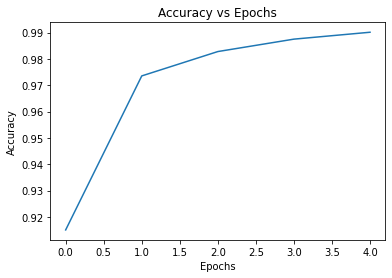

In [14]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

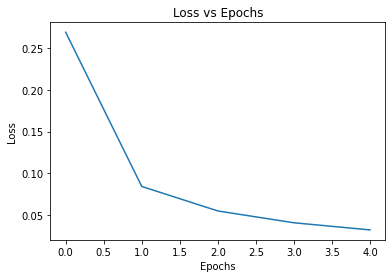

In [15]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [16]:
def evaluate_model(model, scaled_test_images, test_labels):
    
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=0)
    return test_loss, test_accuracy    

In [17]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Test loss: 0.05022086948156357
Test accuracy: 0.9843000173568726


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 


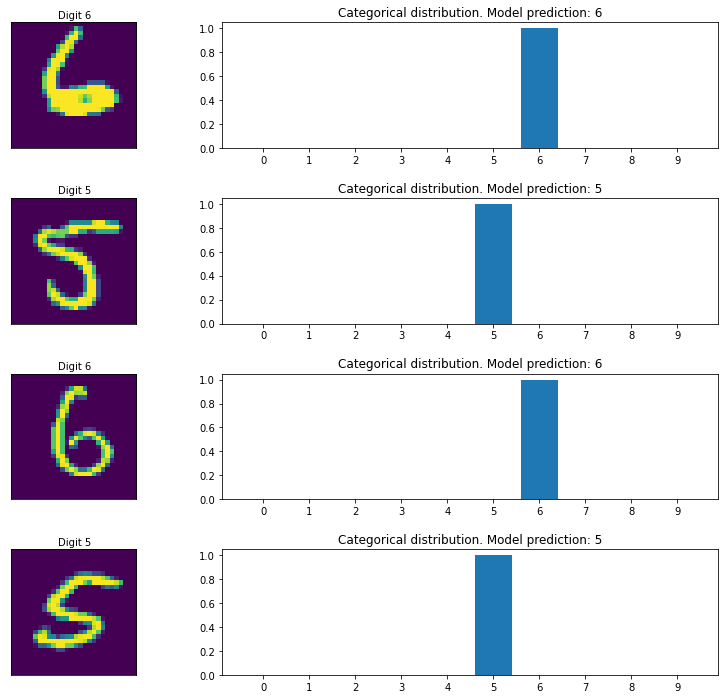

In [18]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()